<a href="https://colab.research.google.com/github/Jom123410/280222/blob/master/Copy_of_analysis_of_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:bc3ce8de-990f-4317-bda4-bf7e2c72c19f.png)

**1. Introduction**

**2. A brief explanation of the dataset**

**3. Data Dictionary**

**4. Data Analysis**

    4.1 Import Libraries
    
    4.2 Import Dataset
    
    4.3 Data Description
    
    4.4 Noise Detection
    
    4.5 Vizualization


![image.png](attachment:72e23cb5-9183-4a58-a5b3-590260626de1.png)

**What is Diabetes?**

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

With diabetes, your body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

There isn’t a cure yet for diabetes, but losing weight, eating healthy food, and being active can really help. Other things you can do to help:

* Take medicine as prescribed.
* Get diabetes self-management education and support.
* Make and keep health care appointments.

https://www.cdc.gov/diabetes/basics/diabetes.html

![image.png](attachment:9fe73cb9-504d-4127-b945-09ce06f71f04.png)

The diabetes.csv file contains the raw data of several hundred rural African-American. Also, this data includes 403 rows (samples) and 18 features such as id, chol, stab.glu, hdl, ratio, loacation, age, gender, height, weight, frame, bp.1s, bp.1d, bp.2s, bp.2d, waist, hip, time.ppn and glyhb as the target which will all be explained in the next section.

![image.png](attachment:a5597ae3-c94f-4325-b4f9-201f4be2a90a.png)

* chol = Cholesterol

* stab.glu = Stabilized Glucose

* hdl = High Density Lipoprotein Cholesterol

* Ratio

* Age and Gender

* Height and Weight

* Frame

* bp.1s = First diastolic blood pressure

* bp.1d = First systolic blood pressure

* Waist

* hip = Hybrid insulin peptides

* time.ppn = Partial parenteral nutrition

![image.png](attachment:4be48cb0-bbd9-496d-99e0-918db33598a1.png)

   ![image.png](attachment:6df1949c-c83b-4c33-874e-1b87469b0210.png)

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)


![image.png](attachment:9b26e9c9-e7e2-4f8b-89fa-f038416f3c31.png)

In [4]:
data = pd.read_csv('/content/diabetes.csv')

# **dataframe of dataset**

In [5]:
df1 = pd.DataFrame(data)
df1

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


# **Information of dataset**

In [6]:
print(df1.shape)

(403, 19)


**removing the column of "id"**

In [7]:
df1.drop(columns=["id"], inplace = True)

**changing the "glyhb" place in the table**

In [8]:
df2 = df1.copy()
df2.drop(columns=["glyhb"], inplace = True)

In [9]:
df2.insert(17,"glyhb",df1["glyhb"])

In [10]:
df2

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0,16.110001
399,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0,4.390000
400,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0,13.630000
401,199.0,76,52.0,3.8,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0,4.490000


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      402 non-null    float64
 1   stab.glu  403 non-null    int64  
 2   hdl       402 non-null    float64
 3   ratio     402 non-null    float64
 4   location  403 non-null    object 
 5   age       403 non-null    int64  
 6   gender    403 non-null    object 
 7   height    398 non-null    float64
 8   weight    402 non-null    float64
 9   frame     391 non-null    object 
 10  bp.1s     398 non-null    float64
 11  bp.1d     398 non-null    float64
 12  bp.2s     141 non-null    float64
 13  bp.2d     141 non-null    float64
 14  waist     401 non-null    float64
 15  hip       401 non-null    float64
 16  time.ppn  400 non-null    float64
 17  glyhb     390 non-null    float64
dtypes: float64(13), int64(2), object(3)
memory usage: 56.8+ KB


In [12]:
Styles =[{"selector":"caption",
         "props":[("color","white"),("text-align","center"),("font-size","15pt"),('background-color',"#20354a")]}]

In [13]:
first_data = df2.head(10).style.set_caption("The 10 first data").set_table_styles(Styles)
first_data.set_properties(**{"background-color": "#acc4db",
                            "color":"black", "border-color":"#243c54"})

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
0,203.000000,82,56.000000,3.600000,Buckingham,46,female,62.000000,121.000000,medium,118.000000,59.000000,nan,nan,29.000000,38.000000,720.000000,4.310000
1,165.000000,97,24.000000,6.900000,Buckingham,29,female,64.000000,218.000000,large,112.000000,68.000000,nan,nan,46.000000,48.000000,360.000000,4.440000
2,228.000000,92,37.000000,6.200000,Buckingham,58,female,61.000000,256.000000,large,190.000000,92.000000,185.000000,92.000000,49.000000,57.000000,180.000000,4.640000
3,78.000000,93,12.000000,6.500000,Buckingham,67,male,67.000000,119.000000,large,110.000000,50.000000,nan,nan,33.000000,38.000000,480.000000,4.630000
4,249.000000,90,28.000000,8.900000,Buckingham,64,male,68.000000,183.000000,medium,138.000000,80.000000,nan,nan,44.000000,41.000000,300.000000,7.720000
5,248.000000,94,69.000000,3.600000,Buckingham,34,male,71.000000,190.000000,large,132.000000,86.000000,nan,nan,36.000000,42.000000,195.000000,4.810000
6,195.000000,92,41.000000,4.800000,Buckingham,30,male,69.000000,191.000000,medium,161.000000,112.000000,161.000000,112.000000,46.000000,49.000000,720.000000,4.840000
7,227.000000,75,44.000000,5.200000,Buckingham,37,male,59.000000,170.000000,medium,nan,nan,nan,nan,34.000000,39.000000,1020.000000,3.940000
8,177.000000,87,49.000000,3.600000,Buckingham,45,male,69.000000,166.000000,large,160.000000,80.000000,128.000000,86.000000,34.000000,40.000000,300.000000,4.840000
9,263.000000,89,40.000000,6.600000,Buckingham,55,female,63.000000,202.000000,small,108.000000,72.000000,nan,nan,45.000000,50.000000,240.000000,5.780000


In [14]:
last_data = df2.tail(10).style.set_caption("The 10 last data").set_table_styles(Styles)
last_data.set_properties(**{"background-color": "#acc4db",
                            "color":"black", "border-color":"#243c54"})

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
393,192.000000,85,69.000000,2.800000,Louisa,51,male,65.000000,146.000000,large,130.000000,110.000000,170.000000,118.000000,nan,nan,60.000000,4.380000
394,169.000000,104,58.000000,2.900000,Louisa,25,female,60.000000,154.000000,medium,140.000000,95.000000,130.000000,94.000000,40.000000,42.000000,60.000000,4.820000
395,179.000000,85,50.000000,3.600000,Louisa,37,male,66.000000,136.000000,medium,190.000000,94.000000,172.000000,100.000000,33.000000,39.000000,480.000000,4.990000
396,216.000000,84,64.000000,3.400000,Louisa,54,female,66.000000,168.000000,medium,132.000000,90.000000,126.000000,80.000000,38.000000,42.000000,330.000000,nan
397,301.000000,90,118.000000,2.600000,Louisa,89,female,61.000000,115.000000,medium,218.000000,90.000000,238.000000,90.000000,31.000000,41.000000,210.000000,4.280000
398,296.000000,369,46.000000,6.400000,Louisa,53,male,69.000000,173.000000,medium,138.000000,94.000000,130.000000,94.000000,35.000000,39.000000,210.000000,16.110001
399,284.000000,89,54.000000,5.300000,Louisa,51,female,63.000000,154.000000,medium,140.000000,100.000000,146.000000,102.000000,32.000000,43.000000,180.000000,4.390000
400,194.000000,269,38.000000,5.100000,Louisa,29,female,69.000000,167.000000,small,120.000000,70.000000,nan,nan,33.000000,40.000000,20.000000,13.630000
401,199.000000,76,52.000000,3.800000,Louisa,41,female,63.000000,197.000000,medium,120.000000,78.000000,nan,nan,41.000000,48.000000,255.000000,4.490000
402,159.000000,88,79.000000,2.000000,Louisa,68,female,64.000000,220.000000,medium,100.000000,72.000000,nan,nan,49.000000,58.000000,900.000000,nan


In [15]:
def describe(df):

    column=[]
    count =[]
    dtype=[]
    unique=[]
    missing=[]
    min_=[]
    max_=[]


    for col_name in df.columns:

        column.append(col_name)
        count.append(len(df[col_name]))
        dtype.append(df[col_name].dtype)
        unique.append(len(df[col_name].unique()))
        missing.append(df[col_name].isna().sum())


        if df[col_name].dtype == "int64" or df[col_name].dtype == "float64":

            min_.append(df[col_name].min())
            max_.append(df[col_name].max())

        else:

            min_.append("NaN")
            max_.append("NaN")


    out_put = pd.DataFrame({"Column":column,
                           "Count":count,
                           "Dtype": dtype,
                           "Unique": unique,
                           "Missing_value":missing,
                           "Min":min_,
                           "Max":max_})


    return out_put


In [16]:
describe(df2)

,Column,Count,Dtype,Unique,Missing_value,Min,Max
0,chol,403,float64,155,1,78.0,443.0
1,stab.glu,403,int64,116,0,48,385
2,hdl,403,float64,78,1,12.0,120.0
3,ratio,403,float64,70,1,1.5,19.299999
4,location,403,object,2,0,NaN,NaN
5,age,403,int64,68,0,19,92
6,gender,403,object,2,0,NaN,NaN
7,height,403,float64,23,5,52.0,76.0
8,weight,403,float64,141,1,99.0,325.0
9,frame,403,object,4,12,NaN,NaN


**dropping bp.2s and bp.2d for big number of missing value**

In [17]:
df3 = df2.copy()
df3.drop(columns=["bp.2s","bp.2d"], inplace = True)
df3

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,16.110001
399,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,4.390000
400,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,13.630000
401,199.0,76,52.0,3.8,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0,4.490000


In [18]:
describe(df3)

,Column,Count,Dtype,Unique,Missing_value,Min,Max
0,chol,403,float64,155,1,78.0,443.0
1,stab.glu,403,int64,116,0,48,385
2,hdl,403,float64,78,1,12.0,120.0
3,ratio,403,float64,70,1,1.5,19.299999
4,location,403,object,2,0,NaN,NaN
5,age,403,int64,68,0,19,92
6,gender,403,object,2,0,NaN,NaN
7,height,403,float64,23,5,52.0,76.0
8,weight,403,float64,141,1,99.0,325.0
9,frame,403,object,4,12,NaN,NaN


**dropping rest of the missing values**

In [19]:
df3= df3.dropna()
df3 = df3.reset_index()

**Noise detection with boxplot**

In [20]:
numeric_features= ['chol', 'stab.glu', 'hdl', 'ratio', 'age','height', 'weight','bp.1s', 'bp.1d', 'waist', 'hip','time.ppn']
categorical = ['gender', 'location', 'frame']

In [21]:
fig = make_subplots(rows = len(numeric_features), cols = 1)


for i,f in enumerate( numeric_features):

    fig.add_trace(go.Box(x = df3[f], name = f), row =i+1, col =1)


fig.update_layout(height = 3000, width = 1000)
fig.show()

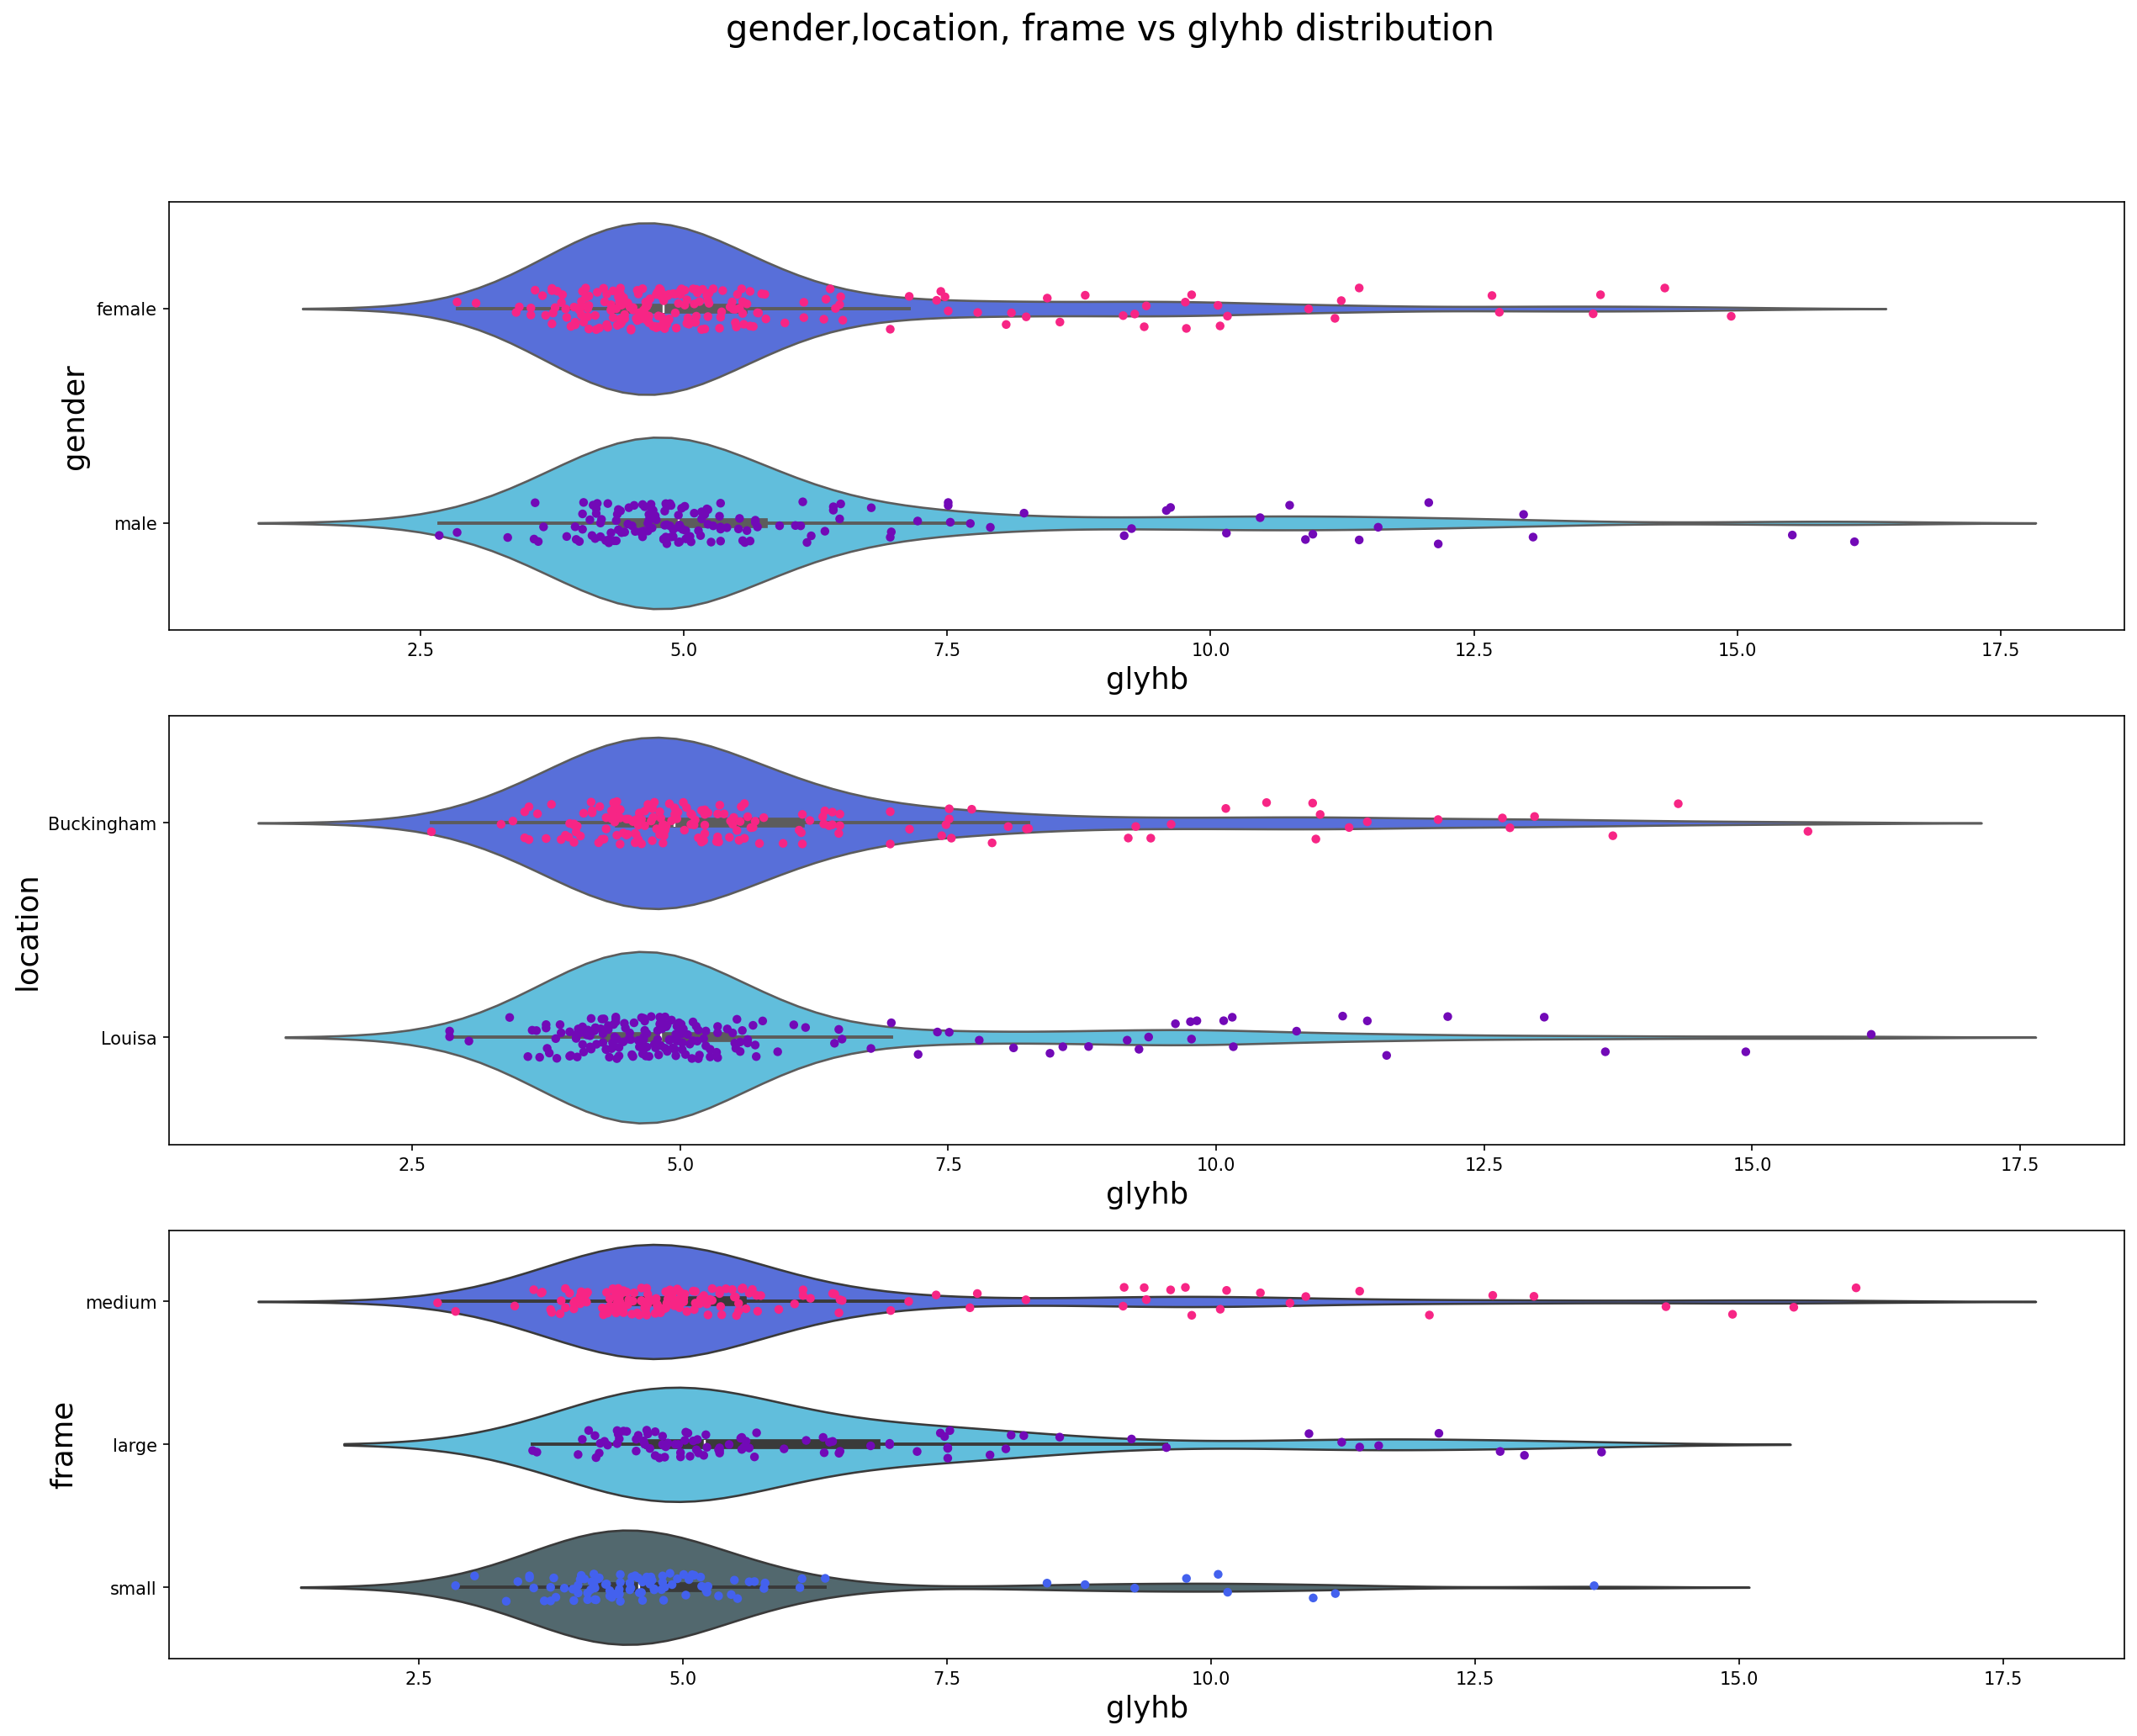

In [22]:
palette1 = ["#F72585", "#7209B7", "#4361EE"]
palette2 = [ "#4361EE", "#4CC9F0",'#4d6a73']

fig,axes = plt.subplots(nrows = 3, ncols= 1, figsize = (20,15), dpi = 150)
fig.suptitle('gender,location, frame vs glyhb distribution ',fontsize=20)

for i , j in enumerate(categorical):

    ax = sns.stripplot(x = "glyhb" , y =j, data = df3,palette = palette1 ,orient = 'h',ax= axes[i])
    ax = sns.violinplot(x = "glyhb", y = j, data =df3,palette = palette2 ,orient = 'h', ax= axes[i])
    ax.set_xlabel('glyhb',fontsize=17)
    ax.set_ylabel(j,fontsize= 17)

plt.show()

**Adding new column named Diabetesfor better analysis**

In [23]:
diabet_list =[]

for i in df3['glyhb']:
    if i <= 5.7:
        i = 'normal'
        diabet_list.append(i)
    elif 5.7 < i <= 6.4:
        i = 'prediabetic'
        diabet_list.append(i)

    else:

        i = 'diabetic'
        diabet_list.append(i)

In [24]:
diabet_df = pd.DataFrame({"Diabetes": diabet_list})

In [25]:
df4 = df3.copy()

df4.insert(16,"Diabetes", diabet_df["Diabetes"])

In [26]:
df4.drop(columns =['index'], inplace=True)
df4

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,Diabetes,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,normal,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,normal,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,normal,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,normal,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,diabetic,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,301.0,90,118.0,2.6,Louisa,89,female,61.0,115.0,medium,218.0,90.0,31.0,41.0,210.0,normal,4.280000
362,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,diabetic,16.110001
363,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,normal,4.390000
364,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,diabetic,13.630000


![image.png](attachment:b9b998b3-3212-4f91-9f83-b428f909d392.png)

**Pie chart of normal vs prediabetic vs diabetic patient of all the dataset**

In [27]:
Diabetic_uniq = df4["Diabetes"].unique()
Diabetic_count = df4["Diabetes"].value_counts()

In [28]:
fig = px.pie (values=Diabetic_count, names=Diabetic_uniq,color_discrete_sequence=px.colors.qualitative.Pastel1 ,title =" normal vs prediabetic vs diabetic patient ")
fig.show()

**chol vs glyhb and Diabetes**

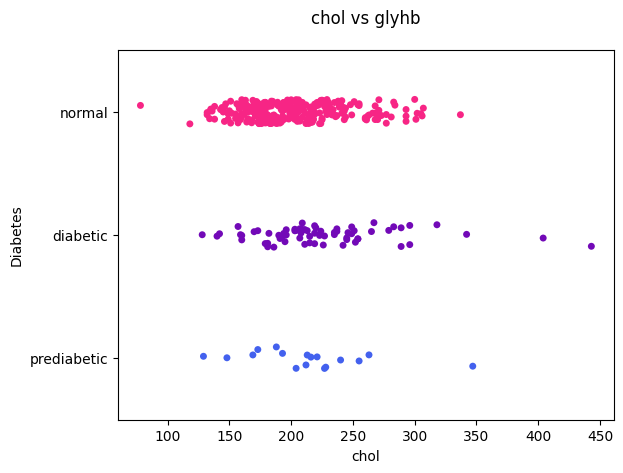

In [29]:
palette = ["#F72585", "#7209B7", "#4361EE", "#4CC9F0",'#4d6a73']

sns.stripplot(x=df4['chol'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("chol vs glyhb", y = 1.05)
plt.show()

In [30]:
palette1 = ["#F72585", "#7209B7", "#4361EE"]

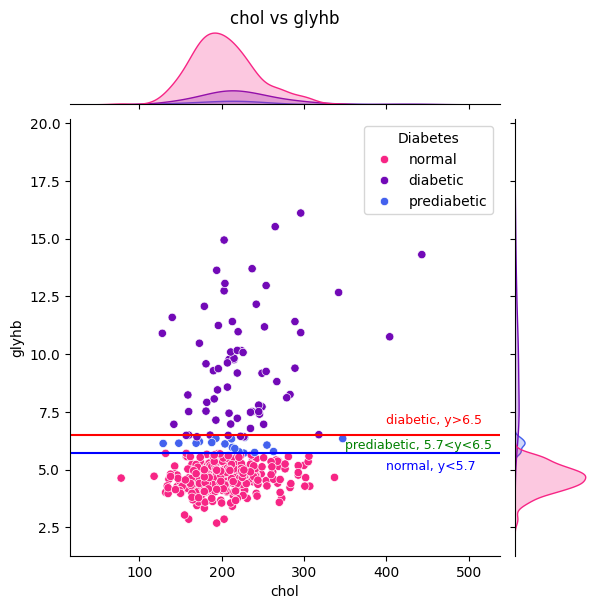

In [31]:
sns.jointplot(x = "chol", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(400, 5, 'normal, y<5.7', fontsize=9, color = 'blue')
plt.text(350, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9, color = 'green')
plt.text(400, 7, 'diabetic, y>6.5', fontsize=9, color ='red')
plt.title("chol vs glyhb", y = 1.2)
plt.show()

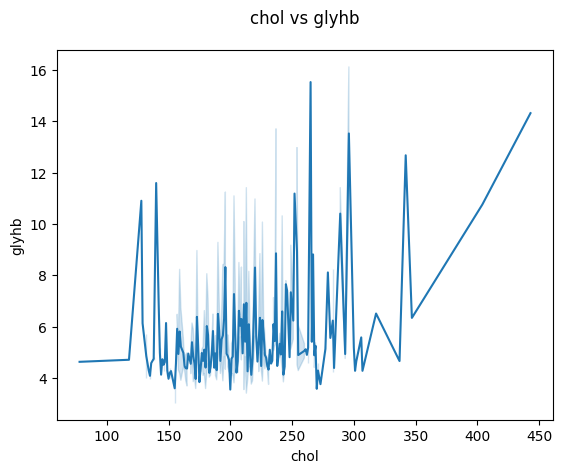

In [32]:
sns.lineplot(x=df4['chol'],y=df4['glyhb'])

plt.xlabel("chol")
plt.ylabel("glyhb")
plt.title("chol vs glyhb", y = 1.05)
plt.show()

**stab.glu vs glyhb and Diabetes**

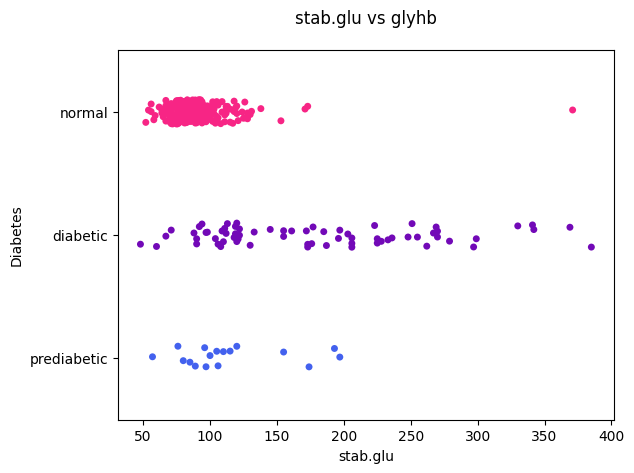

In [33]:
sns.stripplot(x=df4['stab.glu'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("stab.glu vs glyhb", y = 1.05)
plt.show()

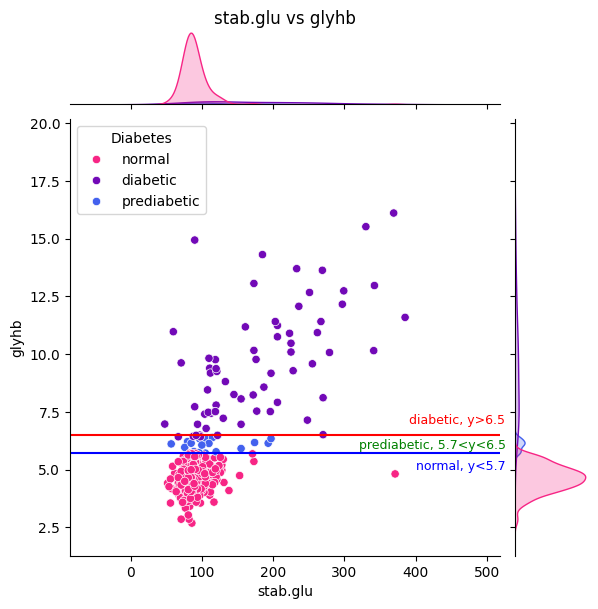

In [34]:
sns.jointplot(x = "stab.glu", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(400, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(320, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(390, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("stab.glu vs glyhb", y = 1.2)
plt.show()

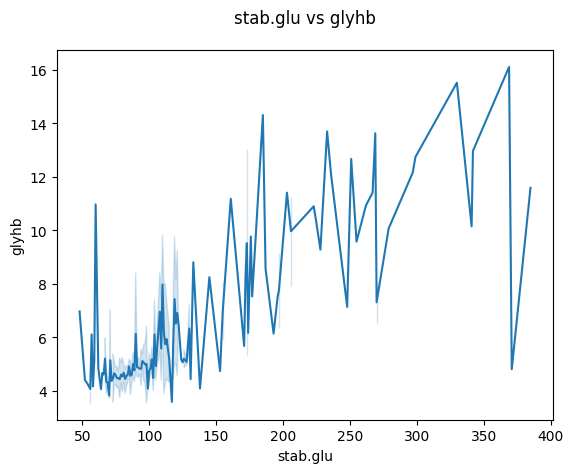

In [35]:
sns.lineplot(x=df4['stab.glu'],y=df4['glyhb'])
plt.xlabel("stab.glu")
plt.ylabel("glyhb")
plt.title("stab.glu vs glyhb", y = 1.05)
plt.show()

**hdl vs glyhb and Diabetes**

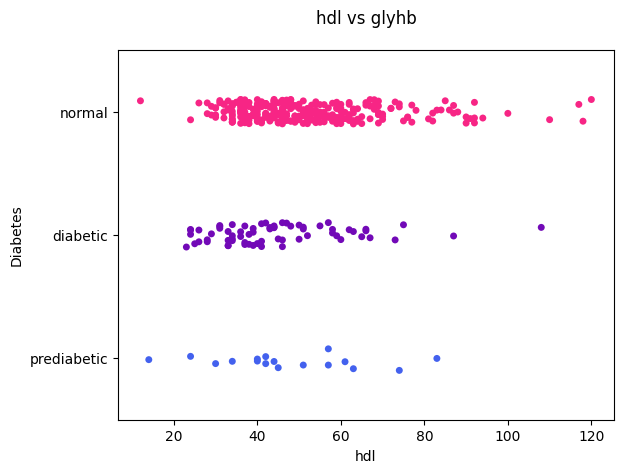

In [36]:
sns.stripplot(x=df4['hdl'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("hdl vs glyhb", y = 1.05)
plt.show()

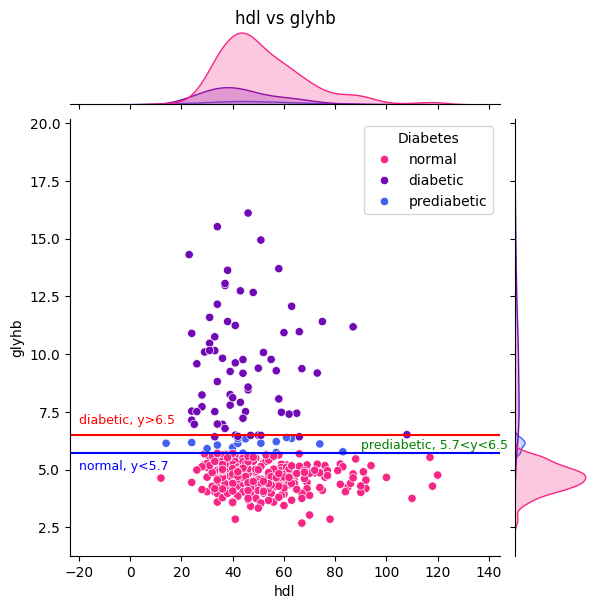

In [37]:
sns.jointplot(x = "hdl", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(-20, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(90, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(-20, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("hdl vs glyhb", y = 1.2)
plt.show()

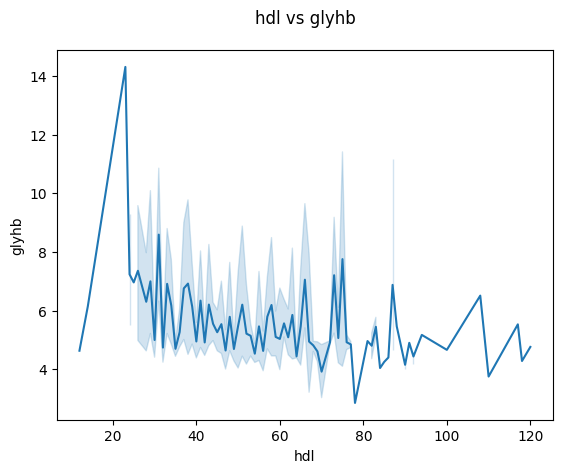

In [38]:
sns.lineplot(x=df4['hdl'],y=df4['glyhb'])
plt.xlabel("hdl")
plt.ylabel("glyhb")
plt.title("hdl vs glyhb", y = 1.05)
plt.show()

**ratio vs glyhb and Diabetes**

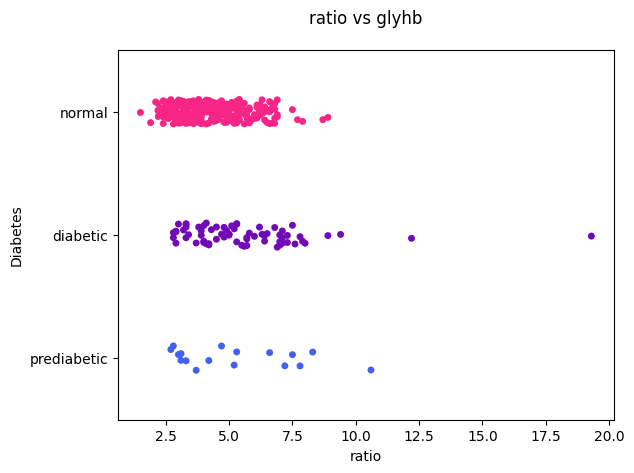

In [39]:
sns.stripplot(x=df4['ratio'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("ratio vs glyhb", y = 1.05)
plt.show()

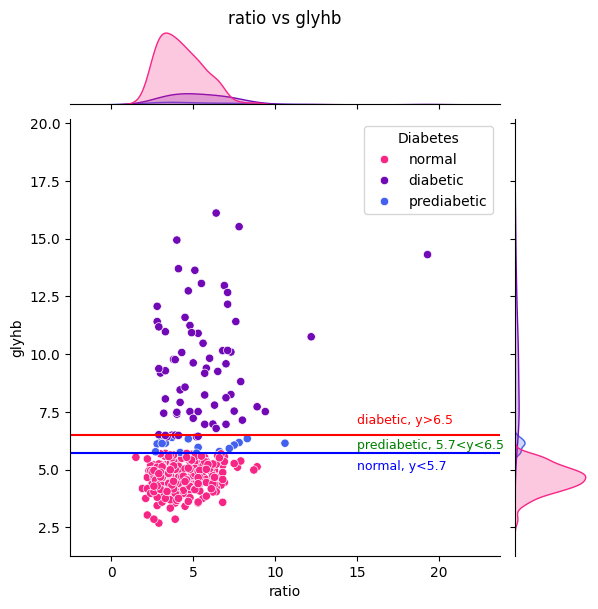

In [40]:
sns.jointplot(x = "ratio", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(15, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(15, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(15, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("ratio vs glyhb", y = 1.2)
plt.show()

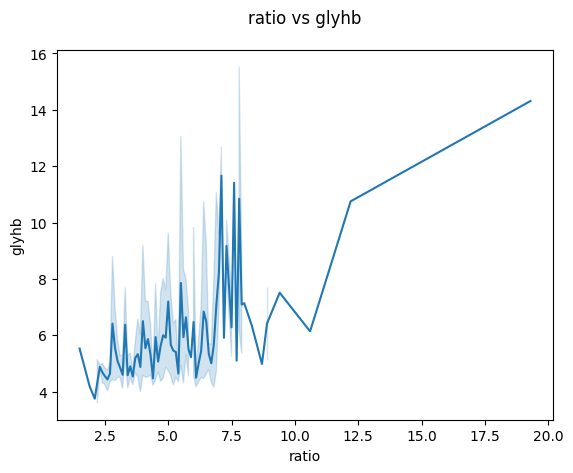

In [41]:
sns.lineplot(x=df4['ratio'],y=df4['glyhb'])
plt.xlabel("ratio")
plt.ylabel("glyhb")
plt.title("ratio vs glyhb", y = 1.05)
plt.show()

**age vs glyhb and Diabetes**

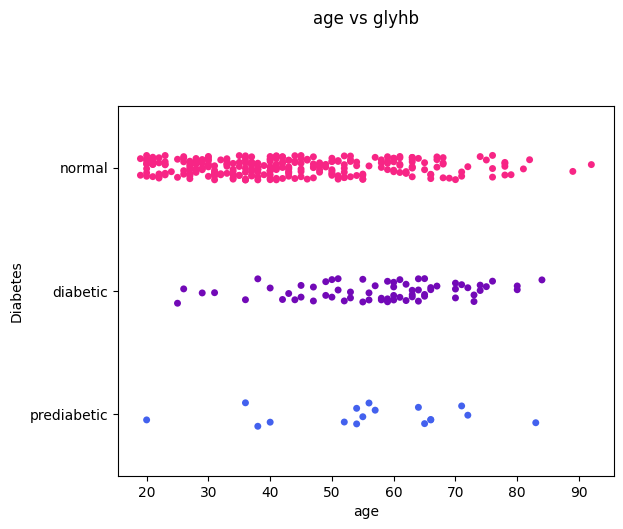

In [42]:
sns.stripplot(x=df4['age'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("age vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.jointplot(x = "age", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(-10, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(75, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(-10, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("age vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['age'],y=df4['glyhb'])
plt.xlabel("age")
plt.ylabel("glyhb")
plt.title("age vs glyhb", y = 1.05)
plt.show()

**height vs glyhb and Diabetes**

In [ ]:
sns.stripplot(x=df4['height'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("height vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.jointplot(x = "height", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(49, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(49, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(49, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("height vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['height'],y=df4['glyhb'])
plt.xlabel("height")
plt.ylabel("glyhb")
plt.title("height vs glyhb", y = 1.05)
plt.show()

**weight vs glyhb and weight**

In [ ]:
sns.stripplot(x=df4['weight'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("weight vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.jointplot(x = "weight", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(280, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(260, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(280, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("weight vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['weight'],y=df4['glyhb'])
plt.xlabel("weight")
plt.ylabel("glyhb")
plt.title("weight vs glyhb", y = 1.05)
plt.show()

**bp.1s vs glyhb and Diabetes**

In [ ]:
sns.stripplot(x=df4['bp.1s'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("bp.1s vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.jointplot(x = "bp.1s", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(220, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(210, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(220, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("bp.1s vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['bp.1s'],y=df4['glyhb'])
plt.xlabel("bp.1s")
plt.ylabel("glyhb")
plt.title("bp.1s vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.stripplot(x=df4['bp.1d'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("bp.1d vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.jointplot(x = "bp.1d", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(120, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(105, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(120, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("bp.1d vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['bp.1d'],y=df4['glyhb'])
plt.xlabel("bp.1d")
plt.ylabel("glyhb")
plt.title("bp.1d vs glyhb", y = 1.05)
plt.show()

**waist vs glyhb and Diabetes**

In [ ]:
sns.stripplot(x=df4['waist'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("waist vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.jointplot(x = "waist", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(57, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(50, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(56, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("waist vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['waist'],y=df4['glyhb'])
plt.xlabel("waist")
plt.ylabel("glyhb")
plt.title("waist vs glyhb", y = 1.05)
plt.show()

**hip vs glyhb and Diabet**

In [ ]:
sns.stripplot(x=df4['hip'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("hip vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.jointplot(x = "hip", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette= palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(60, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(56, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(60, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("hip vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['hip'],y=df4['glyhb'])
plt.xlabel("hip")
plt.ylabel("glyhb")
plt.title("hip vs glyhb", y = 1.05)
plt.show()

**time.ppn vs glyhb and Diabet**

In [ ]:
sns.stripplot(x=df4['time.ppn'],y= df4['Diabetes'], hue =df4['Diabetes'],palette=palette)
plt.title("time.ppn vs glyhb", y = 1.05)
plt.show()

In [ ]:
sns.jointplot(x = "time.ppn", y = 'glyhb',hue= 'Diabetes', kind ="scatter" ,data =df4, palette = palette1)
plt.axhline(y = 5.7 ,color = 'blue')
plt.axhline(y = 6.5 ,color = 'red')

plt.text(1400, 5, 'normal, y<5.7', fontsize=9, color ='blue')
plt.text(1200, 5.9, 'prediabetic, 5.7<y<6.5', fontsize=9,color = 'green')
plt.text(1200, 7, 'diabetic, y>6.5', fontsize=9, color = "red")
plt.title("time.ppn vs glyhb", y = 1.2)
plt.show()

In [ ]:
sns.lineplot(x=df4['time.ppn'],y=df4['glyhb'])
plt.xlabel("time.ppn")
plt.ylabel("glyhb")
plt.title("time.ppn vs glyhb", y = 1.05)
plt.show()

# the average of each feature in normal, prediabetic and diabetic patients

In [ ]:
df_num = df4.copy()
df_num.drop(columns=['location', 'gender','frame'], inplace = True)
df_num

In [ ]:
data_mean = df_num.groupby(pd.Grouper(key = "Diabetes"), as_index = False).mean()
data_mean

In [ ]:
normal = (data_mean['chol'][0],data_mean['stab.glu'][0],data_mean['hdl'][0],data_mean['ratio'][0],data_mean['age'][0],data_mean['height'][0],data_mean['weight'][0],data_mean['bp.1s'][0],data_mean['bp.1d'][0],data_mean['waist'][0],data_mean['hip'][0],data_mean['time.ppn'][0])

diabetic= (data_mean['chol'][1],data_mean['stab.glu'][1],data_mean['hdl'][1],data_mean['ratio'][1],data_mean['age'][1],data_mean['height'][1],data_mean['weight'][1],data_mean['bp.1s'][1],data_mean['bp.1d'][1],data_mean['waist'][1],data_mean['hip'][1],data_mean['time.ppn'][1])

prediabetic = (data_mean['chol'][2],data_mean['stab.glu'][2],data_mean['hdl'][2],data_mean['ratio'][2],data_mean['age'][2],data_mean['height'][2],data_mean['weight'][2],data_mean['bp.1s'][2],data_mean['bp.1d'][2],data_mean['waist'][2],data_mean['hip'][2],data_mean['time.ppn'][2])

###################################################


x = ["chol",'stab.glu', 'hdl', 'ratio','age','height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip','time.ppn']

In [ ]:
trace1=go.Bar(x=x,y=normal,marker=dict(color='green',opacity=0.5),name="normal")
trace2=go.Bar(x=x,y=prediabetic,marker=dict(color='red',opacity=0.5),name="prediabetic")
trace3=go.Bar(x=x,y=diabetic,marker=dict(color='blue',opacity=0.5),name="diabetic")

data=[trace1,trace2,trace3]

layout = go.Layout(title=" the average of each feature in normal, prediabetic and diabetic patients",xaxis=dict(title="feature"),yaxis=dict(title="the average of each feature"),
                   barmode="stack")

fig = go.Figure(data,layout)

fig.show()

# each feature in normal,prediabetic and diabetic women vs men

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "chol", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("chol in normal,prediabetic and diabetic women vs men", y = 3.6, x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "stab.glu", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("stab.glu in normal,prediabetic and diabetic women vs men", y = 3.6, x =0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "hdl", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("hdl in normal,prediabetic and diabetic women vs men", y = 3.6, x =0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "ratio", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("ratio in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes", aspect=1.5)
g.map_dataframe(sns.scatterplot, "age", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("age in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "height", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("height in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "weight", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("weight in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "bp.1s", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("bp.1s in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "bp.1d", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("bp.1d in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "waist", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("waist in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "hip", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("hip in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

In [ ]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .9, f"N = {n}", transform=ax.transAxes)

sns.set()

g= sns.FacetGrid(df4, col ="gender", row= "Diabetes",aspect=1.5)
g.map_dataframe(sns.scatterplot, "time.ppn", "glyhb", edgecolor ="w").add_legend()
g.map_dataframe(annotate)


plt.title("time.ppn in normal,prediabetic and diabetic women vs men", y = 3.6,x=0)
plt.show()

# Heatmap

In [ ]:
df4_num = df4.copy()

In [ ]:
df4_num['location'].replace({'Buckingham': 2, 'Louisa':3}, inplace = True)
df4_num['gender'].replace({'male': 2, 'female':3}, inplace = True)
df4_num['frame'].replace({'medium': 2, 'large':3, 'small':4}, inplace = True)
df4_num['Diabetes'].replace({'normal': 2, 'prediabetic':3, 'diabetic':4}, inplace = True)
df4_num

In [ ]:
sns.set_palette("cubehelix")
plt.figure(figsize=(15,9))
sns.heatmap(df4_num.corr(), annot = True, cmap ="Blues")
plt.title('The correlation among features',y= 1.05)
plt.show()

# 3D scatterplot of the most important features with target(glyhb)

In [ ]:
fig = px.scatter_3d(df4, x='age', y='chol', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("age and chol vs glyhb"))
fig.show()

In [ ]:
fig = px.scatter_3d(df4, x='age', y='ratio', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("age and ratio vs glyhb"))
fig.show()

In [ ]:
fig = px.scatter_3d(df4, x='age', y='stab.glu', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("age and stab.glu vs glyhb"))
fig.show()

In [ ]:
fig = px.scatter_3d(df4, x='gender', y='chol', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("gender and chol vs glyhb"))
fig.show()

In [ ]:
fig = px.scatter_3d(df4, x='gender', y='ratio', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("gender and ratio vs glyhb"))
fig.show()

In [ ]:
fig = px.scatter_3d(df4, x='gender', y='stab.glu', z='glyhb',
                    color='Diabetes', symbol='Diabetes')
fig.update_layout(title_text=("gender and stab.glu vs glyhb"))
fig.show()